<a href="https://colab.research.google.com/github/sandeeptuluri/codvo-ai/blob/main/Tuluri_Sandeep_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise-1 Data Preparation and Preprocessing.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importing the files as data frames

In [ ]:
demo_d = pd.read_csv("https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/DEMO_D.csv")

In [ ]:
bpx_d = pd.read_csv("https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/BPX_D.csv")

In [ ]:
tchol_d = pd.read_csv("https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/TCHOL_D.csv")

merging the data frames

In [ ]:
from functools import reduce

In [ ]:
dfs = [demo_d,bpx_d,tchol_d]

In [ ]:
df_final = reduce(lambda left,right : pd.merge(left,right, on='SEQN'), dfs)

In [ ]:
df_final.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,DMDEDUC,HIGHEST_EDUCATION
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,0.0,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,138.0,4.0,ELEMENTARY
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,0.0,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,180.0,186.0,10.0,ELEMENTARY
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,0.0,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1026.0,4.0,ELEMENTARY
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,0.0,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,528.0,534.0,4.0,ELEMENTARY
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,0.0,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,840.0,846.0,5.0,ELEMENTARY


As given in the document of demo_d, we can fill the missing values by converting the years into months at the time of screening.

In [ ]:
df_final['AGE_AT_SCREENING'] = (df_final['RIDAGEYR'] * 12)

As we don't have the (RIDEXMON) column in the data, so we dont have the details when the examination conducted.
But it is mentioned that the examination is held at two intervals. I am assuming that it may take 6 months as an average to conduct the examination for the citizens.
so i am taking +6  months to the RIDAGEMN as RIDAGEEX.

In [ ]:
df_final['AGE_AT_EXAM'] = (df_final['AGE_AT_SCREENING'] + 6)

In [ ]:
df_final.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,138.0
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,180.0,186.0
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1026.0
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,528.0,534.0
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,NaN,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,840.0,846.0


As the values in the education section are not in a proper manner i formed an another column combining the two columns so that i have given the status of their education as mentioned in the instructions and by following documents.

In [ ]:
df_final.DMDEDUC3 = round(df_final.DMDEDUC3,1)

In [ ]:
df_final.DMDEDUC2 = df_final.DMDEDUC2.replace(np.nan,0)

In [ ]:
df_final.DMDEDUC3 = df_final.DMDEDUC3.replace(np.nan,0)

In [ ]:
df_final['DMDEDUC'] = df_final['DMDEDUC2'] + df_final['DMDEDUC3']

created a new column (DMDEDUC)

In [ ]:
df_final.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,DMDEDUC
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,0.0,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,138.0,4.0
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,0.0,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,180.0,186.0,10.0
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,0.0,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1026.0,4.0
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,0.0,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,528.0,534.0,4.0
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,0.0,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,840.0,846.0,5.0


Giving the status of the education by using the Binning model.

In [ ]:
bins = [0, 12, 16, 99]

In [ ]:
edu_level = ['ELEMENTARY','HIGHSCHOOL','COLLEGE']

In [ ]:
df_final['HIGHEST_EDUCATION'] = pd.cut(df_final['DMDEDUC'], bins, labels=edu_level)

Assigning the Highest level of education to the person.
Filling the NaN as 'ELEMENTARY', as we don't have the perfect data of their education in the document also

In [ ]:
df_final['HIGHEST_EDUCATION'] = df_final['HIGHEST_EDUCATION'].fillna('ELEMENTARY')

Here is the status of their highest level of their education in the column ("HIGHEST_EDUCATION).

In [ ]:
df_final.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,DMDEDUC,HIGHEST_EDUCATION
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,0.0,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,138.0,4.0,ELEMENTARY
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,0.0,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,180.0,186.0,10.0,ELEMENTARY
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,0.0,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1026.0,4.0,ELEMENTARY
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,0.0,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,528.0,534.0,4.0,ELEMENTARY
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,0.0,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,840.0,846.0,5.0,ELEMENTARY


Going to the retired section.

In [ ]:
retired = pd.read_csv('https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/DEMO_RETIRED.CSV')

In [ ]:
retired.head()

,SEQN,RETIRED
0,31127.0,NaN
1,31128.0,0.0
2,31129.0,0.0
3,31130.0,1.0
4,31131.0,0.0


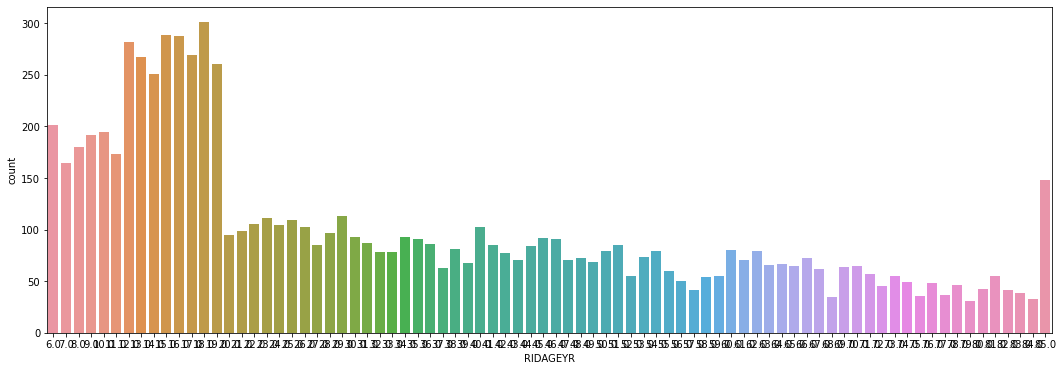

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='RIDAGEYR',data=df_final)

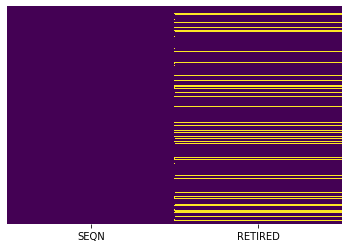

In [ ]:
sns.heatmap(retired.isnull(), yticklabels=False, cmap='viridis', cbar= False)

From the countplot we know that we are having the many people who are aged more than 67.
From the heatmap we know that we are having many null values.

As per the rules in the united states the retirement age is around 67. so, i am taking the 67 is the retirement age to fill the null values.

For those who are having 67 and above i am assigning them as retired.

In [ ]:
final = pd.merge(df_final,retired,on='SEQN')

In [ ]:
final.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,DMDEDUC,HIGHEST_EDUCATION,RETIRED
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,0.0,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,138.0,4.0,ELEMENTARY,0.0
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,0.0,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,180.0,186.0,10.0,ELEMENTARY,0.0
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,0.0,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1026.0,4.0,ELEMENTARY,1.0
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,0.0,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,528.0,534.0,4.0,ELEMENTARY,0.0
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,0.0,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,840.0,846.0,5.0,ELEMENTARY,1.0


In [ ]:
final.RETIRED.isnull().sum()

0

but we can assign the resigned status only after knowing the age, after merging the dataframes we are not getting the age of the persons with null values.

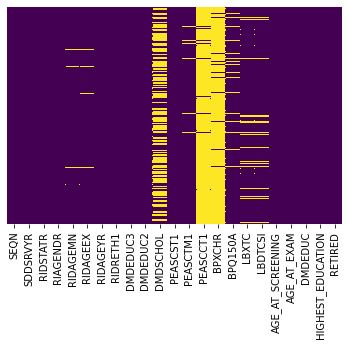

In [ ]:
sns.heatmap(final.isnull(), yticklabels=False, cmap='viridis', cbar=False)

Now there are no null values,from the heatmap in the retired column

...

.....

EXERCISE - 2 : MODEL BUILDING

.....

 Building model for the customers who are going to claim their insurance in their first year.

Loading the data.

In [ ]:
claim_pred = pd.read_csv("https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/claim_prediction.csv")

In [ ]:
claim_pred.head()

,EADDC,EAFXA,FDDBC,AFDDA,AXCXA,EXCCE,FBXFC,DFFEC,CEXAE,BBADX,CLAIM
0,-0.193513,0.021062,-0.870351,4.314903,-4.260162,-1.259531,0.175603,-0.942903,2.333260,4.678712,0
1,2.667844,-3.195978,2.718651,-0.885312,2.964261,2.161336,2.008505,-0.296360,-0.610780,-2.545978,1
2,2.280602,0.048539,-2.179863,-0.380866,-1.212960,2.097278,5.131315,-1.250050,2.362880,2.207307,0
3,0.592376,-1.590548,2.329976,-1.416489,1.743390,3.040990,2.371740,-0.190549,0.890761,-2.671923,0
4,1.236896,-0.656180,-0.381064,-2.332379,0.660684,2.055621,0.478162,-0.269513,2.614886,-3.655301,0


let's check the info and features of the dataset.

In [ ]:
claim_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EADDC   10000 non-null  float64
 1   EAFXA   10000 non-null  float64
 2   FDDBC   10000 non-null  float64
 3   AFDDA   10000 non-null  float64
 4   AXCXA   10000 non-null  float64
 5   EXCCE   10000 non-null  float64
 6   FBXFC   10000 non-null  float64
 7   DFFEC   10000 non-null  float64
 8   CEXAE   10000 non-null  float64
 9   BBADX   10000 non-null  float64
 10  CLAIM   10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


As the data is cleaned and well scaled, we will now move forward to the correlation in the dataframe.

let's check the correlation between the features by using a heatmap

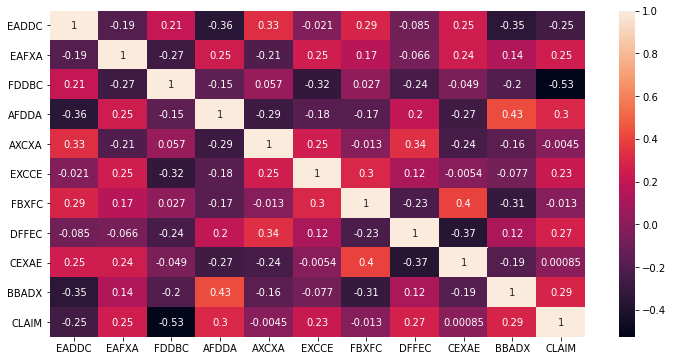

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(claim_pred.corr(), annot = True)

From the heatmap we can know that, only some features are highly correlating with the "CLAIM" feature.
The features are 'EAFXA','AFDDA', 'EXCCE', 'DFFEC', 'BBADX',and finally 'CEXAE'.

In [ ]:
claim_pred.columns

Index(['EADDC', 'EAFXA', 'FDDBC', 'AFDDA', 'AXCXA', 'EXCCE', 'FBXFC', 'DFFEC',
       'CEXAE', 'BBADX', 'CLAIM'],
      dtype='object')

In [ ]:
claim_pred = claim_pred.drop(['EADDC','FDDBC','AXCXA','FBXFC'], axis=1)

In [ ]:
claim_pred.head()

,EAFXA,AFDDA,EXCCE,DFFEC,CEXAE,BBADX,CLAIM
0,0.021062,4.314903,-1.259531,-0.942903,2.333260,4.678712,0
1,-3.195978,-0.885312,2.161336,-0.296360,-0.610780,-2.545978,1
2,0.048539,-0.380866,2.097278,-1.250050,2.362880,2.207307,0
3,-1.590548,-1.416489,3.040990,-0.190549,0.890761,-2.671923,0
4,-0.656180,-2.332379,2.055621,-0.269513,2.614886,-3.655301,0


Now the data looks good, we can train model now.

lets split the data by loading the functions.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = claim_pred.drop(['CLAIM'],axis=1)
y = claim_pred['CLAIM']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Importing the Logistic Regression model and fitting and training the data.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the performance of the model trained.

In [ ]:
predictions = log_model.predict(X_test)

Printing the metrics of the model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
log_train_accu = accuracy_score(y_train,log_model.predict(X_train))
log_test_accu = accuracy_score(y_test, predictions)

print(f'Training accuracy of the logistic regression is :{log_train_accu}')
print(f'Testing accuracy of the logistic regression is :{log_test_accu}')
print('\n')
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Training accuracy of the logistic regression is :0.7374285714285714
Testing accuracy of the logistic regression is :0.7466666666666667


              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1519
           1       0.75      0.74      0.74      1481

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



[[1145  374]
 [ 386 1095]]


This model doesn't seems to be a good one

Let's check another model for better accuracy.

Importing support vector classifier from SVM

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC()

svclassifier.fit(X_train, y_train)

svpred = svclassifier.predict(X_test)

In [ ]:
svc_train_accu = accuracy_score(y_train, svclassifier.predict(X_train))
svc_test_accu = accuracy_score(y_test, svpred)

print(f'Training accuracy of the support vector classifier is :{svc_train_accu}')
print(f'Testing accuracy of the support vector classifier is :{svc_test_accu}')
print('\n')
print(classification_report(y_test, svpred))
print('\n')
print(confusion_matrix(y_test, svpred))

Training accuracy of the support vector classifier is :0.8584285714285714
Testing accuracy of the support vector classifier is :0.8523333333333334


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1519
           1       0.83      0.87      0.85      1481

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



[[1262  257]
 [ 186 1295]]


This model seems good let's check some other model.

Import KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

knc.fit(X_train, y_train)

knc_pred = knc.predict(X_test)

In [ ]:
knc_train_accu = accuracy_score(y_train,knc.predict(X_train))
knc_test_accu = accuracy_score(y_test, knc_pred)

print(f'Training accuracy of the kneighbors classifier is :{log_train_accu}')
print(f'Testing accuracy of the kneighbors classifier is :{log_test_accu}')
print('\n')
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Training accuracy of the kneighbors classifier is :0.7374285714285714
Testing accuracy of the kneighbors classifier is :0.7466666666666667


              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1519
           1       0.75      0.74      0.74      1481

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



[[1145  374]
 [ 386 1095]]


From all the three models i assume the SUPPORT VECTOR CLASSIFIER gives the best accuracy for the data. because this model best fits this type of data and it will perform well for the new similar data that are going to be given.

...

...

EXERCISE - 3 : MODEL EVALUATION

....

1. Answer for the 1st question.

  * Actually there is no perfect answer for the number of clusters, because it depends on the method used to find the similarities and parameters for partition. but there many indices to find the optimal number of clusters for better results. the two major approaches are domain knowledge and data driven approach.

  * The efficacy of the KMeans Clustering largely depends on the optimal number of clusters given in the model. if clusters are too high, each point boardly start representing a cluster and if clusters are low, the data points are incorrectly clustered. so selecting the optimal numbers of clusters gives the best efficiency.


2. Answer for the 2nd question.

  * High variance can be reduced by dropping least important or unwanted features in the dataset before training the model.
  * Increasing the size of the training set also can reduce the high variance.
  * Reducing the overfitting, having reasonable variance, avoiding nosiy data helps in fixing the bias, it is better to leave the linear models when the target and features don't match that better.

3. Answer to the 3rd question.

    * I will choose a model 4 (training error - 105, validation error - 85).
    Because, training error depends on the quality of the data, at some point of time in training model, the training accuracy increases and validation accuracy decreases. so this model gives the better validation score comparing to the other other models that is going to give better accuracy when validated with test data.

4. Answer to the 4th question.

    * Recall = (True positive) / (true positive + false negative)
             = (112/(112+97))
             = 0.535
    
    * Precision = (truepositive) / (true positive + false positive)
                = (112/(112+48))
                = 0.7

    * F1 score = 2*(Precision*Recall)/(Precision + Recall)
               = (2*(0.535*0.7))/(0.535+0.7)
               = 0.606

    * If i have to choose this model i will focus on Type 2 error(False postives and false negatives), because while dealing with the cancer, if it is given positive for non-cancer patients and negative for cancer patients there is no point of doing it. The metric i am going to choose is 'misclassification',focusing on these things we can eliminate maximum errors.

    * if i have to deal with a youtube video i will go with Type 1 error(false positives). there is no meaning if we recommended inappropriate video(false positives) to the users. the metric i am going to focus is Precison where i can better deal with the best positive decion(video) i can make.

....

...

EXERCISE - 4 : ANOMALY DETECTION.

...

Anomaly detection in oil and gas. 
Reading and converting the data into dataframe using pandas.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
oil = pd.read_csv("https://raw.githubusercontent.com/sandeeptuluri/codvo-ai/main/anomaly_detection.csv")

In [55]:
oil.head()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
0,0.000000,0.000000,3.000000,3.000000,8.000000
1,1.232260,-0.217305,3.193780,3.489992,7.792553
2,2.540129,0.606709,3.180950,3.464811,7.817440
3,5.520271,1.470812,3.330528,2.968375,7.409152
4,5.914298,2.745060,3.061706,3.440980,7.153049


Info about the dataset

In [17]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CEACC   365 non-null    float64
 1   CCDEF   365 non-null    float64
 2   FAXAE   365 non-null    float64
 3   FBFFD   365 non-null    float64
 4   EDDAB   365 non-null    float64
dtypes: float64(5)
memory usage: 14.4 KB


As it is said in the instructions, the data is well cleaned and scaled.
so, we are creating an another column to indicate anomaly in the data, if anomaly present = 1, absent = 0.

It is said that the anomaly is spotted between the dates of 14th february to 21 february (i.e, from 45th day from strting of the year to 52nd day(7 days). by using this we are creating a column called "ANOMALY".

In [53]:
a = [0, 44, 52, 364]

In [54]:
b = ["0", "1", "0"]

In [57]:
oil["ANOMALY"] = pd.cut(oil.index, a, labels=b, ordered=False)

In [63]:
oil.head()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB,ANOMALY
0,0.000000,0.000000,3.000000,3.000000,8.000000,NaN
1,1.232260,-0.217305,3.193780,3.489992,7.792553,0
2,2.540129,0.606709,3.180950,3.464811,7.817440,0
3,5.520271,1.470812,3.330528,2.968375,7.409152,0
4,5.914298,2.745060,3.061706,3.440980,7.153049,0


In [66]:
oil['ANOMALY'] = oil['ANOMALY'].fillna('0')

In [67]:
oil.head()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB,ANOMALY
0,0.000000,0.000000,3.000000,3.000000,8.000000,0
1,1.232260,-0.217305,3.193780,3.489992,7.792553,0
2,2.540129,0.606709,3.180950,3.464811,7.817440,0
3,5.520271,1.470812,3.330528,2.968375,7.409152,0
4,5.914298,2.745060,3.061706,3.440980,7.153049,0


Now the data is ready

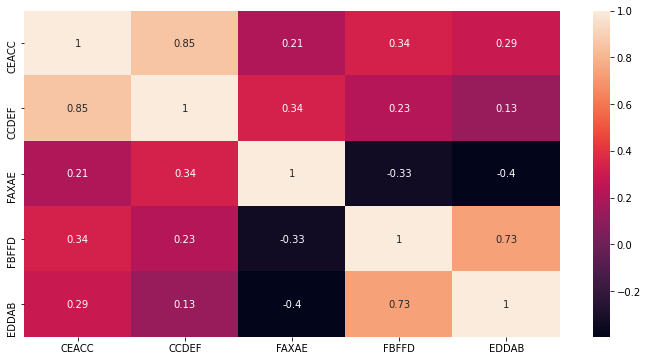

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(oil.corr(), annot = True)

Many features got well correlated so, we can proceed with the training by splitting the data.

From the instructions, the training data should be of first 9 months(i.e, 273 days) and the test data is of the last three months(i.e, 92 days)

In [69]:
oil_train = oil[:273]

In [70]:
oil_test = oil[273:]

We can check both the info of the both dataframes

In [71]:
oil_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CEACC    273 non-null    float64 
 1   CCDEF    273 non-null    float64 
 2   FAXAE    273 non-null    float64 
 3   FBFFD    273 non-null    float64 
 4   EDDAB    273 non-null    float64 
 5   ANOMALY  273 non-null    category
dtypes: category(1), float64(5)
memory usage: 11.1 KB


In [72]:
oil_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 273 to 364
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CEACC    92 non-null     float64 
 1   CCDEF    92 non-null     float64 
 2   FAXAE    92 non-null     float64 
 3   FBFFD    92 non-null     float64 
 4   EDDAB    92 non-null     float64 
 5   ANOMALY  92 non-null     category
dtypes: category(1), float64(5)
memory usage: 3.9 KB


Both training and testing datasets looks good. lets proceed for the model.

Importing the PCA model

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=2)

Fitting and transforming the model.

In [75]:
pca.fit(oil_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [76]:
pca_train = pca.transform(oil_train)

In [77]:
pca_test = pca.transform(oil_test)

Checking the shapes of the train and test sets

In [78]:
oil_train.shape

(273, 6)

In [79]:
pca_train.shape

(273, 2)

In [80]:
oil_test.shape

(92, 6)

In [81]:
pca_test.shape

(92, 2)

we have good quality data.

Plotting a scatter plot from the data obtained by PCA model.

Text(0.5, 1.0, 'Trained scatter plot')

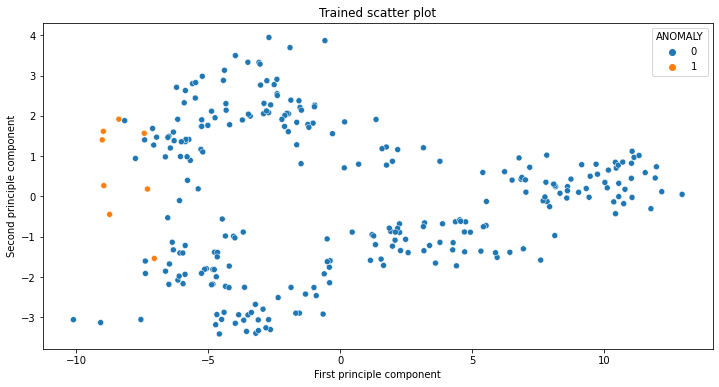

In [99]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = pca_train[:,0], y = pca_train[:,1], hue = oil['ANOMALY'].iloc[:273])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title('Trained scatter plot')

From scatter plot we can clearly see the anomaly, and this data can be used for model building.

We will approach with OneclassSVM

In [95]:
from sklearn.svm import OneClassSVM

In [96]:
ocsvm = OneClassSVM()

Fitting and predicting the model.

In [97]:
ocsvm.fit(pca_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [98]:
pred1 = ocsvm.predict(pca_test)

Plotting the scatter plot for finding the anomalies using the predictions from the model trained.

Text(0.5, 1.0, 'Test dataset scatter plot')

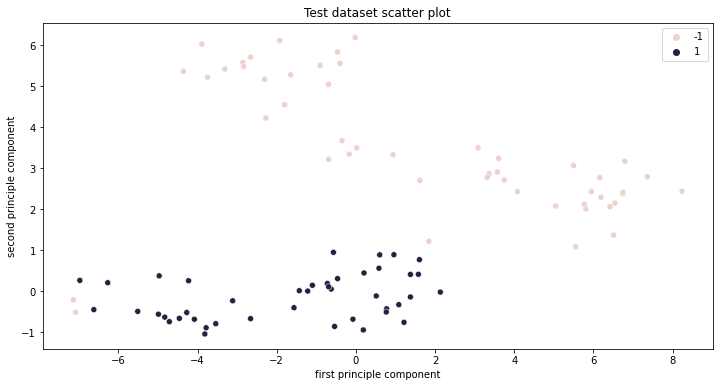

In [106]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = pca_test[:,0], y = pca_test[:,1], hue = pred1)
plt.xlabel("first principle component")
plt.ylabel("second principle component")
plt.title("Test dataset scatter plot")

From this data set we can get the anomalies.

..

...

...

This is Tuluri Sandeep, here i completed my assignment to the best of my knowledge. I hope i performed well amd it will impress you.

As i am from non_cse background, i may commit some mistakes, but i can learn and do these things efficiently in the future. 

Thanks for the oppurtunity......

i will be waiting for your reply...